##**Importações**

---



In [ ]:
# descomente o código abaixo para instalar as bibliotecas necessárias
# !pip install numpy
# !pip install opencv-python
# !pip install matplotlib
# !pip install scikit-learn
import numpy as np # biblioteca matematica do python
import cv2 #leitura e escrita de imagens
import os #manipulacao de diretorios
import matplotlib.pyplot as plt #exibicao de imagens atraves de graficos
from sklearn.model_selection import train_test_split #funcao para dividir os dados entre treino e teste

##**Armazenando todos os nomes das imagens do conjunto de dados em um vetor**

---



In [ ]:
path = "archive\\" #diretorio do dataset
classes = ["Negative", "Positive"] # ou os.listdir(path)
imagesPath = []

for classe in classes:
  imagesPath.append(os.listdir(path+classe)) #listagem dos caminhos de cada imagem sendo armazenadas em um vetor

print(imagesPath[0][0:100]) #primeiras 100 imagens da classe 0

['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg', '00025.jpg', '00026.jpg', '00027.jpg', '00028.jpg', '00029.jpg', '00030.jpg', '00031.jpg', '00032.jpg', '00033.jpg', '00034.jpg', '00035.jpg', '00036.jpg', '00037.jpg', '00038.jpg', '00039.jpg', '00040.jpg', '00041.jpg', '00042.jpg', '00043.jpg', '00044.jpg', '00045.jpg', '00046.jpg', '00047.jpg', '00048.jpg', '00049.jpg', '00050.jpg', '00051.jpg', '00052.jpg', '00053.jpg', '00054.jpg', '00055.jpg', '00056.jpg', '00057.jpg', '00058.jpg', '00059.jpg', '00060.jpg', '00061.jpg', '00062.jpg', '00063.jpg', '00064.jpg', '00065.jpg', '00066.jpg', '00067.jpg', '00068.jpg', '00069.jpg', '00070.jpg', '00071.jpg', '00072.jpg', '00073.jpg', '00074.jpg', '00075.jpg', '00076.jpg', '00077.jpg'

##**lendo a quarta imagem da segunda classe com a biblioteca opencv**

---



In [ ]:

examplePath = os.path.join(path, classes[1], imagesPath[1][3]) #junta os caminhos, ex: pasta archive, positive, imagem 00001.png. Retorno: archive/positive/00001.png
example = cv2.imread(examplePath) #funcao para ler uma imagem



##**Plotando a imagem com a biblioteca matplotlib**

---



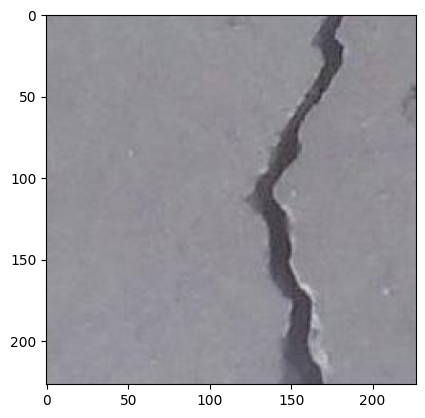

In [ ]:
plt.imshow(example)
plt.show()

##**Formato da máscara lida (3 matrizes 227x227)**
1.   todas as imagens sao matrizes e cada elemento da matriz é um vetor com três posições que representam a cor vermelha, verde e azul de um pixel da imagem
2.   r(red), g(green), b(blue)
---



In [ ]:
print(example.shape) # dimensão da matriz, formato
print(example)

(227, 227, 3)
[[[137 136 140]
  [140 139 143]
  [144 143 147]
  ...
  [146 145 149]
  [145 144 148]
  [145 144 148]]

 [[140 139 143]
  [141 140 144]
  [142 141 145]
  ...
  [145 144 148]
  [145 144 148]
  [144 143 147]]

 [[145 144 148]
  [142 141 145]
  [140 139 143]
  ...
  [144 143 147]
  [144 143 147]
  [143 142 146]]

 ...

 [[153 153 159]
  [154 154 160]
  [154 154 160]
  ...
  [143 142 152]
  [143 142 152]
  [143 142 152]]

 [[153 153 159]
  [154 154 160]
  [154 154 160]
  ...
  [145 144 154]
  [145 144 154]
  [145 144 154]]

 [[153 153 159]
  [154 154 160]
  [154 154 160]
  ...
  [148 147 157]
  [148 147 157]
  [148 147 157]]]


 ## **Convertendo a imagem para escala de cinza (`cor*[0.2989, 0.5870, 0.1140] -> número`)**


1.   cada pixel vai de 0 (preto) a 255 (branco)
2.   a imagem deve ser convertida em escala de cinza para reduzir o tamanho e economizar recursos computacionais

---




In [ ]:
example = cv2.cvtColor(example, cv2.COLOR_RGB2GRAY)/255 #o resultado da conversão é dividido por 255 a fim de
                                                        # deixar todos os valores entre 0 e 1, pois acelera
                                                        # as operações computacionais

##**Plotando novamente, mas indicando que a imagem está em escala de cinza**

---



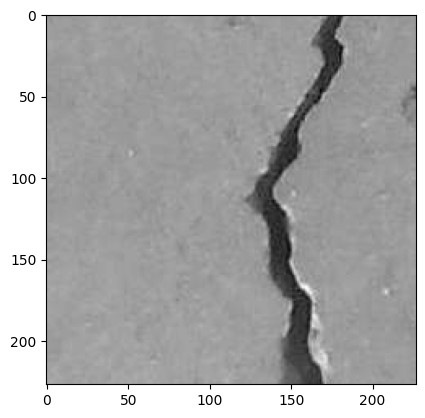

In [ ]:
plt.imshow(example, cmap="gray")
plt.show()

##**Redimensionando a imagem para `(size_x, size_y)`**

---



In [ ]:
size_x = 16 #altura
size_y = 16 #largura
example = cv2.resize(example, (size_x, size_y))

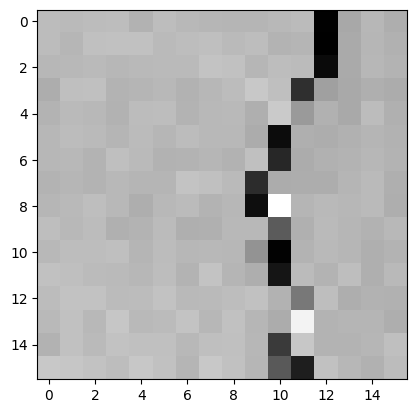

In [ ]:
plt.imshow(example, cmap="gray")
plt.show()

##**Transformando a matriz em um vetor**

---



In [ ]:
example = example.flatten() #transforma a matriz para vetor unidimensional
print(example.shape)
print(example)

(256,)
[0.58018153 0.57743183 0.58051471 0.58112745 0.56293275 0.58089384
 0.57320389 0.56936275 0.56742877 0.56854703 0.57254902 0.57843903
 0.26506587 0.54649969 0.57191713 0.55686275 0.57965686 0.57015548
 0.58737745 0.58823529 0.58803998 0.57647059 0.58210784 0.58578431
 0.57683824 0.58235294 0.56523055 0.56767387 0.26297871 0.54933364
 0.56929764 0.56202895 0.57230392 0.57365196 0.57659314 0.57242647
 0.57483915 0.57634804 0.57647059 0.59202282 0.58812423 0.56976486
 0.58247549 0.57875306 0.27984835 0.54949066 0.57230392 0.56470588
 0.55453431 0.58542816 0.5875     0.56522289 0.56792662 0.57398131
 0.5625     0.57138097 0.57983686 0.60090763 0.58553922 0.34307215
 0.53323759 0.54771752 0.55806526 0.55392157 0.56445312 0.57583487
 0.57385493 0.56265702 0.57924709 0.58102405 0.56458333 0.57401961
 0.57512255 0.55834482 0.60436964 0.52203585 0.56078431 0.54811964
 0.57997472 0.56066176 0.57120098 0.57977941 0.57616805 0.56862745
 0.57781863 0.56948912 0.58039216 0.57254902 0.57298943

##**Recuperando o formato**

---



(16, 16)


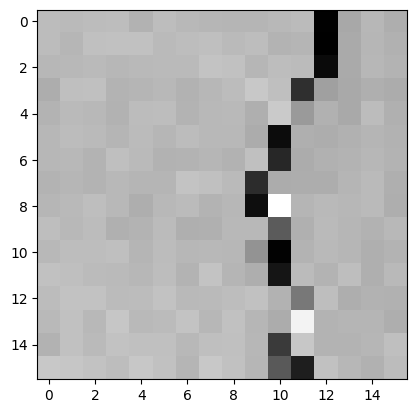

In [ ]:
example = np.reshape(example, (size_x, size_y))

print(example.shape)

plt.imshow(example, cmap="gray")
plt.show()

##**Funções resumidas**

---



In [ ]:
#funções finais:
def saveImg(path, img):
    files = path.split("\\")
    os.makedirs(files[0]+"2\\"+files[1], exist_ok=True) #cria as pastas onde a imagem cópia ficará
    cv2.imwrite(files[0]+"2\\"+files[1]+"\\"+files[2], 255*img, [cv2.IMWRITE_JPEG_QUALITY, 100]) #escreve a imagem no diretorio da
                                                                                                 #sua classe com qualidade jpeg 100
    return                                                                                       #e escala de 0 a 255


def readImgToGrayScale(path, size_x=16, size_y=16): #lê a imagem na escala cinza, a redimensiona e normaliza os valores para [0, 1]
    return cv2.resize(cv2.imread(path, 0)/255.0, (size_x, size_y))

def readImgToGrayScaleVector(path, size_x=16, size_y=16): #identico a readImgToGrayScale, mas transforma o resultado em vetor unidimensional
    return cv2.resize(cv2.imread(path, 0)/255.0, (size_x, size_y)).flatten()

def grayScaleVectorToImg(vector, size_x=16, size_y=16): #retorna um vetor unidimensional para forma de matriz original (size_x, size_y)
    return np.reshape(vector, (size_x, size_y))

def plotImg(img): #visualiza a imagem
    plt.imshow(img, cmap="gray")
    plt.show()
    return

##**Exemplo de uso**

---



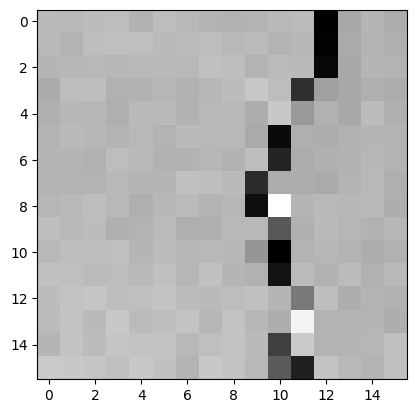

In [ ]:
size_x = 16
size_y = 16
path = os.path.join(path, classes[1], imagesPath[1][3]) #caminho da imagem
img = readImgToGrayScale(path, size_x, size_y) #le a imagem reduzida na escala cinza
plotImg(img) #exibe a imagem
saveImg(path, img)

1.   em teste_size=0.3 divide os dados em 70% para treinamento (x_train, y_train) e 30% para teste (x_test, y_test)
2.   x representa todos os vetores unidimensionais
3.   y representa a classe a qual cada vetor pertence
4.   random=42 garante que a divisao dos dados vai ser a mesma ao executar o codigo varias vezes
5.   shuffle=True embaralha os dados antes de dividi-los para evitar enviesamento

##**Divisão entre dados de treinamento e teste.**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True) # utilize as funções disponibilizadas para preencher x e y